<a href="https://colab.research.google.com/github/AdriCode/learn-git/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BAG OF WORDS:
  Convert Reddit comments into numerical form using Bag-of-Words, then train a classifier to predict sentiment (positive, negative, neutral).

In [9]:
import pandas as pd

df = pd.read_csv("/content/NLP/23k_r_gaming_comments_sentiments.csv")
df.head()

,Unnamed: 0,Comment,sentiment
0,0,Them: I don't think I like this game.\n\nMe: B...,negative
1,1,Then you leave them to farm the smaller creatu...,negative
2,2,Nothing beats the feeling you get when you see...,positive
3,3,"[Also, they're made of paper](https://i.imgur....",negative
4,4,Haha... That was exactly it when my brother tr...,positive


In [10]:
df.shape
df['sentiment'].value_counts()


,count
sentiment,
positive,10034
neutral,9083
negative,4072


Since it's relatively balanced, accuracy is a reliable metric

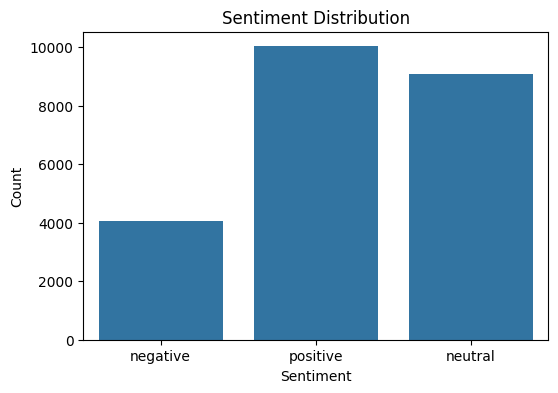

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/NLP/23k_r_gaming_comments_sentiments.csv")

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Text Cleaning:
  Remove stop words, why?
    Appear frequently but don’t carry sentiment meaning.

In [12]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)              # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)          # Remove numbers & symbols
    text = text.lower()                             # Lowercase
    text = " ".join([word for word in text.split()
                     if word not in stop_words])
    return text

df['clean_text'] = df['Comment'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Split into train and test:
  80% for training
  20% for testing

In [23]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Bag-of-Words:
- Converts text into a vector of word counts.
- Ignores word order.
- Creates a vocabulary from training data.

One hot encoding : only tells us if the word is present or not in binary form , i.e 0 for absent or 1 for present


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Binary representation
binary_vectorizer = CountVectorizer(binary=True)

X_train_binary = binary_vectorizer.fit_transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

classifier_binary = LogisticRegression(max_iter=1000)
classifier_binary.fit(X_train_binary, y_train)

y_pred_binary = classifier_binary.predict(X_test_binary)

print("Binary BoW Accuracy:", accuracy_score(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))


Binary BoW Accuracy: 0.7815868909012506
              precision    recall  f1-score   support

    negative       0.70      0.51      0.59       814
     neutral       0.75      0.86      0.80      1817
    positive       0.84      0.82      0.83      2007

    accuracy                           0.78      4638
   macro avg       0.76      0.73      0.74      4638
weighted avg       0.78      0.78      0.78      4638



Count - vectorized is term frequency, i.e it tells us how many times the word appears in the review

fit_transform() learns vocabulary from training data.
transform() converts test data using same vocabulary.
::
18,551 training samples
15,871 unique words (features)

In [25]:
tf_vectorizer = CountVectorizer()

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

classifier_tf = LogisticRegression(max_iter=1000)
classifier_tf.fit(X_train_tf, y_train)

y_pred_tf = classifier_tf.predict(X_test_tf)

print("Term Frequency Accuracy:", accuracy_score(y_test, y_pred_tf))
print(classification_report(y_test, y_pred_tf))



Term Frequency Accuracy: 0.7833117723156533
              precision    recall  f1-score   support

    negative       0.71      0.51      0.60       814
     neutral       0.75      0.86      0.80      1817
    positive       0.84      0.83      0.83      2007

    accuracy                           0.78      4638
   macro avg       0.77      0.73      0.74      4638
weighted avg       0.78      0.78      0.78      4638



Tf-IDF:
  Term Frequency – Inverse Document Frequency
  measures the importance of a word in a document relative to the entire corpus. It increases weight for words frequent in a document but rare across documents, and reduces weight for commonly occurring words.


If a word appears in almost every document,
it is not useful for distinguishing sentiment.

TF(t,d)=Number of times term t appears in document d / Total words in document
{How many times a word appears in a document.}
IDF(t)=log(N/(1+DF(t)))
{How common is this word across all documents}
TF-IDF(t,d)=TF(t,d)xIDF(t)
:: {It appears frequently in that document
AND
It appears rarely across other documents}

eg:     "bad" gets weight, but common words like "game" lose weight

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier_tfidf = LogisticRegression(max_iter=1000)
classifier_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = classifier_tfidf.predict(X_test_tfidf)

print("TF-IDF Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


TF-IDF Accuracy: 0.7828805519620526
              precision    recall  f1-score   support

    negative       0.76      0.46      0.57       814
     neutral       0.76      0.85      0.80      1817
    positive       0.82      0.86      0.83      2007

    accuracy                           0.78      4638
   macro avg       0.78      0.72      0.73      4638
weighted avg       0.78      0.78      0.77      4638



In [27]:
acc_binary = accuracy_score(y_test, y_pred_binary)
acc_tf = accuracy_score(y_test, y_pred_tf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)


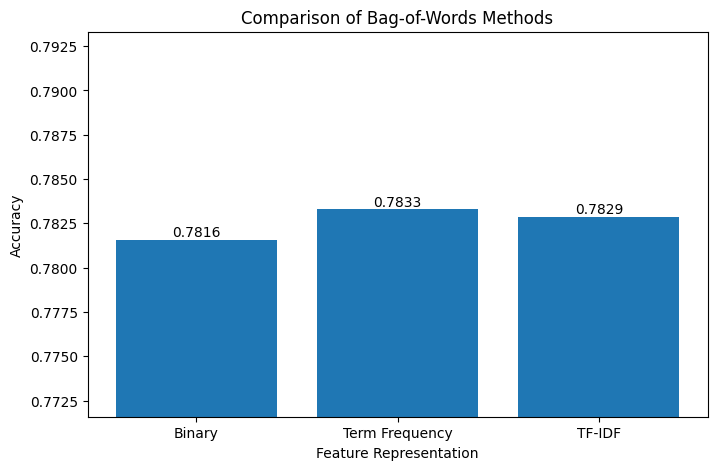

In [45]:
import matplotlib.pyplot as plt

methods = ['Binary', 'Term Frequency', 'TF-IDF']
accuracies = [acc_binary, acc_tf, acc_tfidf]

plt.figure(figsize=(8,5))
bars = plt.bar(methods, accuracies)

# Dynamically zoom y-axis based on min accuracy
min_acc = min(accuracies)
max_acc = max(accuracies)
plt.ylim(min_acc - 0.01, max_acc + 0.01)

plt.xlabel("Feature Representation")
plt.ylabel("Accuracy")
plt.title("Comparison of Bag-of-Words Methods")

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:.4f}',
             ha='center',
             va='bottom')

plt.show()

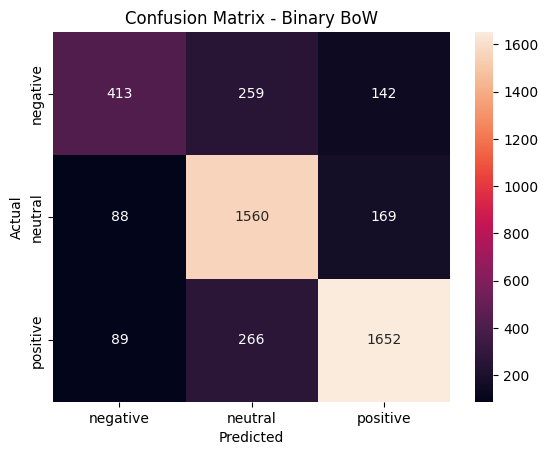

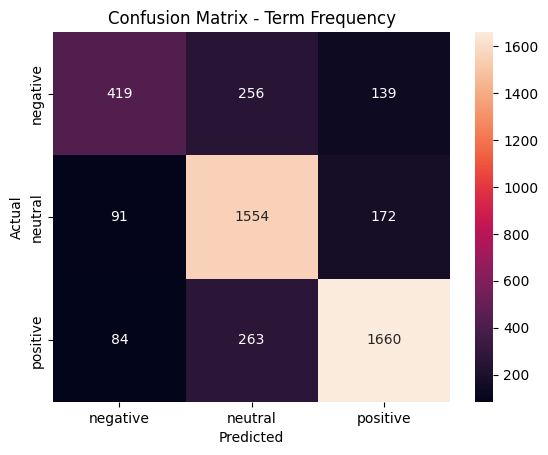

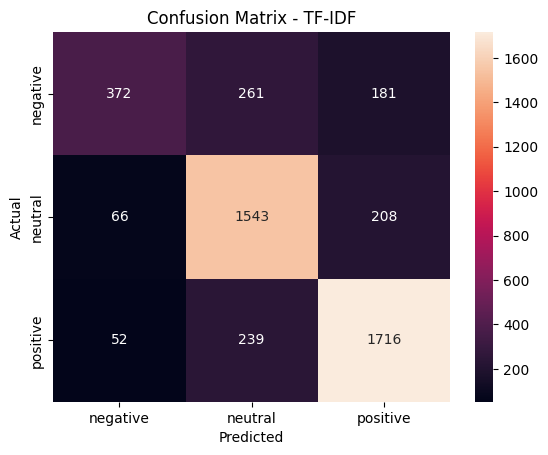

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_binary = confusion_matrix(y_test, y_pred_binary)

plt.figure()
sns.heatmap(cm_binary, annot=True, fmt='d',
            xticklabels=classifier_binary.classes_,
            yticklabels=classifier_binary.classes_)

plt.title("Confusion Matrix - Binary BoW")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_tf = confusion_matrix(y_test, y_pred_tf)

plt.figure()
sns.heatmap(cm_tf, annot=True, fmt='d',
            xticklabels=classifier_tf.classes_,
            yticklabels=classifier_tf.classes_)

plt.title("Confusion Matrix - Term Frequency")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

plt.figure()
sns.heatmap(cm_tfidf, annot=True, fmt='d',
            xticklabels=classifier_tfidf.classes_,
            yticklabels=classifier_tfidf.classes_)

plt.title("Confusion Matrix - TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [30]:
feature_names = tfidf_vectorizer.get_feature_names_out()


Logistic Regression learns a weight for every word (feature).We sort the learned coefficients and select the words with highest positive weights for each class

In [31]:
import numpy as np

classes = classifier_tfidf.classes_

for i, class_label in enumerate(classes):

    top10 = np.argsort(classifier_tfidf.coef_[i])[-10:]

    print(f"\nTop 10 words for class: {class_label}")
    print([feature_names[j] for j in top10])



Top 10 words for class: negative
['wtf', 'wrong', 'dead', 'dick', 'hate', 'kill', 'bad', 'fuck', 'hell', 'shit']

Top 10 words for class: neutral
['legendary', 'lobby', 'counts', 'legend', 'oof', 'spirit', 'pubg', 'yet', 'removed', 'deleted']

Top 10 words for class: positive
['better', 'lmao', 'pretty', 'lol', 'play', 'good', 'great', 'best', 'like', 'love']


In Logistic Regression:
A coefficient weight tells us how strongly a feature (word) influences a particular class prediction.

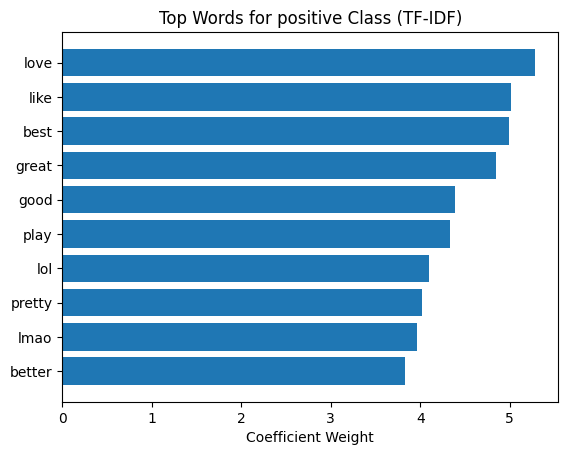

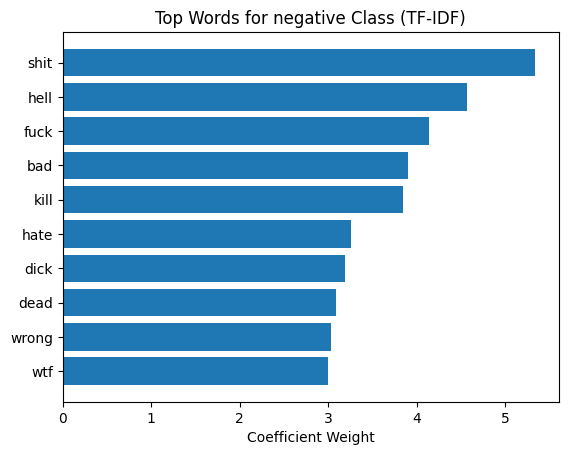

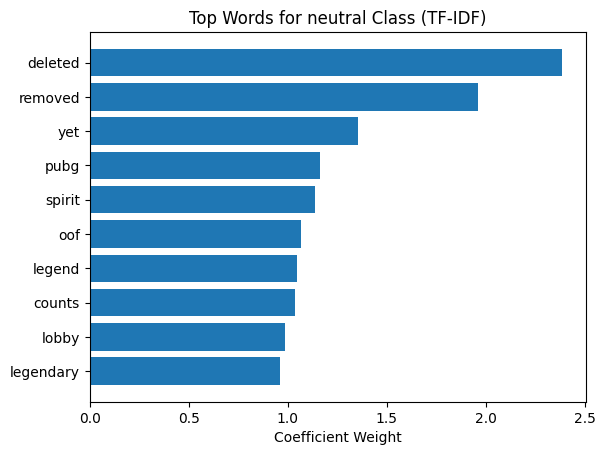

In [34]:
class_index = list(classes).index('positive')

top10 = np.argsort(classifier_tfidf.coef_[class_index])[-10:]

words = [feature_names[i] for i in top10]
weights = classifier_tfidf.coef_[class_index][top10]

plt.figure()
plt.barh(words, weights)
plt.title("Top Words for positive Class (TF-IDF)")
plt.xlabel("Coefficient Weight")
plt.show()

class_index = list(classes).index('negative')

top10 = np.argsort(classifier_tfidf.coef_[class_index])[-10:]

words = [feature_names[i] for i in top10]
weights = classifier_tfidf.coef_[class_index][top10]

plt.figure()
plt.barh(words, weights)
plt.title("Top Words for negative Class (TF-IDF)")
plt.xlabel("Coefficient Weight")
plt.show()

class_index = list(classes).index('neutral')

top10 = np.argsort(classifier_tfidf.coef_[class_index])[-10:]

words = [feature_names[i] for i in top10]
weights = classifier_tfidf.coef_[class_index][top10]

plt.figure()
plt.barh(words, weights)
plt.title("Top Words for neutral Class (TF-IDF)")
plt.xlabel("Coefficient Weight")
plt.show()




Raw Text
   ↓
Tokenizer
   ↓
Integer Sequence
   ↓
Padding
   ↓
Embedding Layer
   ↓
Sequence of Dense Word Vectors
   ↓
LSTM (captures order + context)
   ↓
Final Hidden State (sentence meaning)
   ↓
Dense Layer
   ↓
Sigmoid
   ↓
Probability
   ↓
Sentiment Output

In [ ]:
bag of words and word embeddings are just methods of feature representation. ## SARCASM

WORD EMBEDDINGS:
  Dense vector representations of words that capture semantic meaning.{Words that appear in similar contexts
→ Get similar vectors.}

Because Bag-of-Words:
 -Ignores word order
 -Cannot capture context
 -Cannot capture semantic similarity
 -Produces very large sparse vectors

 {I thought the game would be great, but it turned out horrible}

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000   # Keep top 10,000 frequent words

tokenizer = Tokenizer(num_words=max_words) # builds a vocabulary -> It assigns an index to each word. {top 10000 words kept}
tokenizer.fit_on_texts(X_train)

Convert Sentences to Sequences:
"game is good"
Becomes:
[1, 45, 2]

In [36]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

Padding
Neural networks require fixed-length input.
But comments are different lengths. {every comment is now of length 100: short ones padded with zeros, long ones truncated}

In [37]:
max_length = 100

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

It automatically assigns numbers to each class. But neural networks cannot work with words as labels.

WHY ONE_HOT ENCODING ?
  final layer is soft_max ⁉To compare prediction with true label,
the true label must also be in vector form.
That’s why we use one-hot encoding.

In [38]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()

#this converts into numers , alphabetically : positive-> 2 , neutral -> 1 , negative -> 0
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

#this converts into one-hot labels
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

Now we have the sequences, now pass this to the lstm model

LSTM(long short term memory) :
It decides what to:
Keep
Forget
Update
Because language depends on:
Word order
Context
Long-range dependencies
Example:
"I thought the game would be great, but it turned out horrible"

LSTM(64)::Each memory unit:
Stores information over time
Learns patterns in sequences
Produces one output value {increasing the number of units increased model capacity, which led to overfitting on the training data, reducing generalization performance.}

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 100

model = Sequential()

# 1️⃣ Embedding Layer : This layer learns semantic vectors during training.
model.add(Embedding(input_dim=max_words,
                    output_dim=embedding_dim,
                    input_length=max_length))

# 2️⃣ LSTM Layer : 64 memory units : Processes words sequentially, Learns contextual patterns
model.add(LSTM(64))

# 3️⃣ Output Layer : Softmax is an activation function used in the final layer of a neural network for multi-class classification.
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

epoch : One full pass through the entire training dataset. {One full pass through the entire training dataset.}

Batch size : number of samples processed before updating weights.

Dropout : randomly disables neurons during training. {Less memorization.}

In [40]:
history = model.fit(
    X_train_pad,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.6052 - loss: 0.8733 - val_accuracy: 0.7871 - val_loss: 0.5670
Epoch 2/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.8507 - loss: 0.4151 - val_accuracy: 0.7949 - val_loss: 0.5725
Epoch 3/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 38s 71ms/step - accuracy: 0.8982 - loss: 0.2910 - val_accuracy: 0.7963 - val_loss: 0.6037
Epoch 4/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.9299 - loss: 0.2186 - val_accuracy: 0.7842 - val_loss: 0.6933
Epoch 5/5
464/464 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9406 - loss: 0.1868 - val_accuracy: 0.7817 - val_loss: 0.7973


In [41]:
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
print("Embedding + LSTM Accuracy:", accuracy)

145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7765 - loss: 0.8310
Embedding + LSTM Accuracy: 0.7757654190063477


145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


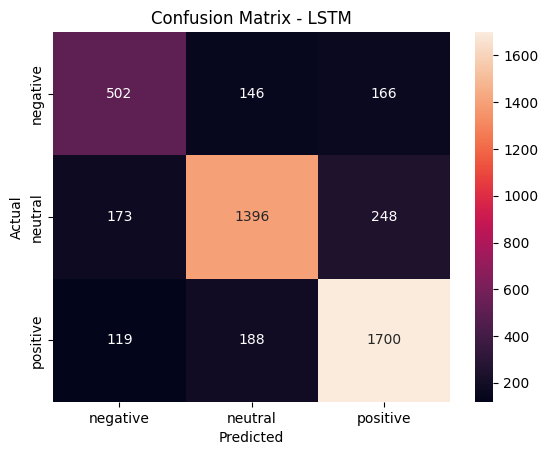

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test_enc, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
comparison = {
    "Binary BoW": acc_binary,
    "Term Frequency": acc_tf,
    "TF-IDF": acc_tfidf,
    "Word Embedding (LSTM)": accuracy  # your LSTM test accuracy
}

for model, score in comparison.items():
    print(f"{model}: {score:.4f}")

Binary BoW: 0.7816
Term Frequency: 0.7833
TF-IDF: 0.7829
Word Embedding (LSTM): 0.7758


MODEL 2: add dropouts: Dropout randomly disables neurons during training.

In [45]:
from tensorflow.keras.layers import Dropout

model_dropout = Sequential()
model_dropout.add(Embedding(input_dim=max_words,
                            output_dim=100,
                            input_shape=(max_length,)))

model_dropout.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model_dropout.add(Dense(3, activation='softmax'))

model_dropout.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(
    X_train_pad,
    y_train_cat,
    epochs=8,
    batch_size=32,
    validation_split=0.2
)

loss_dropout, acc_dropout = model_dropout.evaluate(X_test_pad, y_test_cat)
print("LSTM + Dropout Accuracy:", acc_dropout)

Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


464/464 ━━━━━━━━━━━━━━━━━━━━ 72s 146ms/step - accuracy: 0.5856 - loss: 0.8990 - val_accuracy: 0.7766 - val_loss: 0.5979
Epoch 2/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 70s 150ms/step - accuracy: 0.8320 - loss: 0.4706 - val_accuracy: 0.8001 - val_loss: 0.5628
Epoch 3/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 80s 145ms/step - accuracy: 0.8871 - loss: 0.3255 - val_accuracy: 0.7960 - val_loss: 0.5992
Epoch 4/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 85s 151ms/step - accuracy: 0.9155 - loss: 0.2609 - val_accuracy: 0.7863 - val_loss: 0.6687
Epoch 5/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 80s 148ms/step - accuracy: 0.9310 - loss: 0.2093 - val_accuracy: 0.7804 - val_loss: 0.7234
Epoch 6/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - accuracy: 0.9418 - loss: 0.1849 - val_accuracy: 0.7736 - val_loss: 0.7959
Epoch 7/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 67s 145ms/step - accuracy: 0.9513 - loss: 0.1529 - val_accuracy: 0.7710 - val_loss: 0.8697
Epoch 8/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 69s 149ms/step - accuracy: 0.9566 - loss: 0.1384 - val_accura

MODEL 3: bi-directional : Better context understanding.
But sentiment often depends on later words.
Bidirectional LSTM reads:
left → right
right → left

In [46]:
from tensorflow.keras.layers import Bidirectional

model_bi = Sequential()
model_bi.add(Embedding(input_dim=max_words,
                       output_dim=100,
                       input_shape=(max_length,)))

model_bi.add(Bidirectional(LSTM(64)))
model_bi.add(Dense(3, activation='softmax'))

model_bi.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history_bi = model_bi.fit(
    X_train_pad,
    y_train_cat,
    epochs=8,
    batch_size=32,
    validation_split=0.2
)

loss_bi, acc_bi = model_bi.evaluate(X_test_pad, y_test_cat)
print("Bidirectional LSTM Accuracy:", acc_bi)

Epoch 1/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 67s 137ms/step - accuracy: 0.6102 - loss: 0.8679 - val_accuracy: 0.8006 - val_loss: 0.5571
Epoch 2/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 62s 134ms/step - accuracy: 0.8544 - loss: 0.4066 - val_accuracy: 0.8041 - val_loss: 0.5683
Epoch 3/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 61s 131ms/step - accuracy: 0.9029 - loss: 0.2848 - val_accuracy: 0.7920 - val_loss: 0.6205
Epoch 4/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.9263 - loss: 0.2191 - val_accuracy: 0.7885 - val_loss: 0.6682
Epoch 5/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.9395 - loss: 0.1770 - val_accuracy: 0.7771 - val_loss: 0.7423
Epoch 6/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 61s 131ms/step - accuracy: 0.9542 - loss: 0.1524 - val_accuracy: 0.7766 - val_loss: 0.8377
Epoch 7/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 64s 138ms/step - accuracy: 0.9643 - loss: 0.1170 - val_accuracy: 0.7586 - val_loss: 0.9288
Epoch 8/8
464/464 ━━━━━━━━━━━━━━━━━━━━ 62s 134ms/step - accuracy: 0.9734 - loss: 0.0901 - 

we notice that the accuracy keeps decreasing
why?
1️⃣ Dataset is moderate (~23k)
2️⃣ LSTM is high capacity
3️⃣ Sentiment task is mostly keyword-driven
4️⃣ TF-IDF already works well
5️⃣ Deep model is too powerful for this task


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Smaller learning rate
optimizer = Adam(learning_rate=0.0005)

model_improved = Sequential()

# Embedding Layer
model_improved.add(Embedding(
    input_dim=max_words,
    output_dim=100,
    input_shape=(max_length,)
))

# Smaller Bidirectional LSTM (controlled capacity)
model_improved.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)))

# Dense + Dropout
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dropout(0.3))

# Output
model_improved.add(Dense(3, activation='softmax'))

model_improved.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model_improved.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,036,227 (3.95 MB)

 Trainable params: 1,036,227 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [51]:
history_improved = model_improved.fit(
    X_train_pad,
    y_train_cat,
    epochs=20,  # allow many epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 103s 206ms/step - accuracy: 0.5151 - loss: 0.9887 - val_accuracy: 0.6769 - val_loss: 0.7599
Epoch 2/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 141s 203ms/step - accuracy: 0.7524 - loss: 0.6565 - val_accuracy: 0.7839 - val_loss: 0.5845
Epoch 3/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 95s 204ms/step - accuracy: 0.8559 - loss: 0.4262 - val_accuracy: 0.7955 - val_loss: 0.5788
Epoch 4/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 143s 205ms/step - accuracy: 0.8941 - loss: 0.3392 - val_accuracy: 0.7917 - val_loss: 0.5973
Epoch 5/20
464/464 ━━━━━━━━━━━━━━━━━━━━ 140s 202ms/step - accuracy: 0.9137 - loss: 0.2813 - val_accuracy: 0.7906 - val_loss: 0.6602


Initially, the LSTM model overfitted the dataset. Training accuracy increased significantly while validation accuracy decreased. This indicated the model was memorizing the training data rather than generalizing. To address this, I reduced the model capacity, added dropout regularization, used a lower learning rate, and implemented early stopping to prevent overtraining. These changes improved generalization performance, though TF-IDF remained competitive due to the nature of the sentiment task.

In [52]:
loss_improved, acc_improved = model_improved.evaluate(X_test_pad, y_test_cat)

print("Improved LSTM Accuracy:", acc_improved)

145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7902 - loss: 0.5977
Improved LSTM Accuracy: 0.7966796159744263


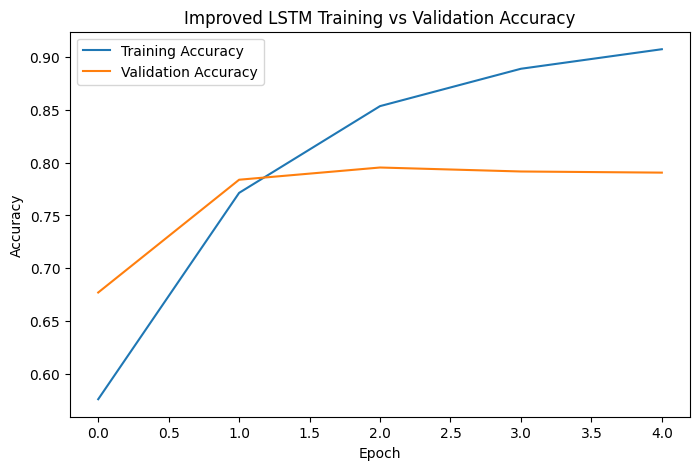

In [58]:
plt.figure(figsize=(8,5))

plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')

plt.title("Improved LSTM Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
final_comparison = {
    "Binary BoW": acc_binary,
    "TF": acc_tf,
    "TF-IDF": acc_tfidf,
    "Baseline LSTM": accuracy,
    "Improved LSTM": acc_improved
}

for model, score in final_comparison.items():
    print(f"{model}: {score:.4f}")

Binary BoW: 0.7816
TF: 0.7833
TF-IDF: 0.7829
Baseline LSTM: 0.7708
Improved LSTM: 0.7967


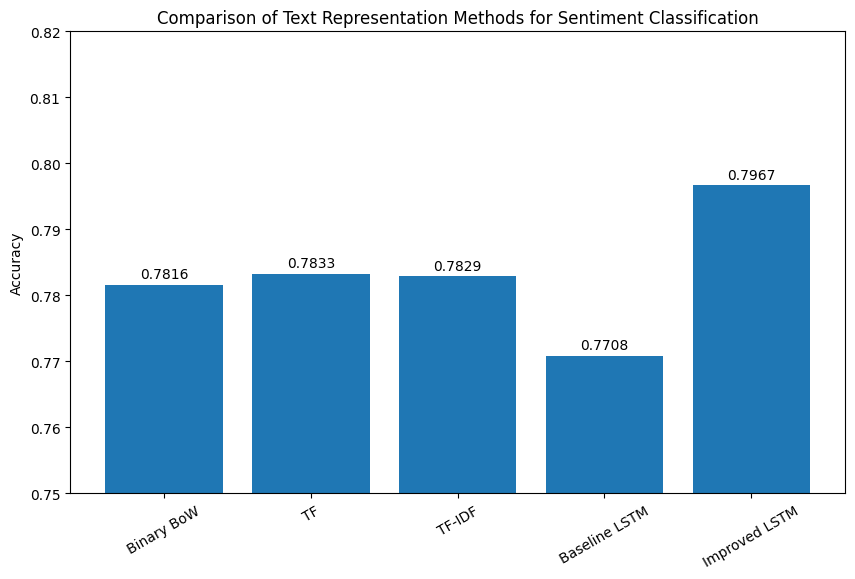

In [56]:
import matplotlib.pyplot as plt
import numpy as np

models = list(final_comparison.keys())
scores = list(final_comparison.values())

plt.figure(figsize=(10,6))

bars = plt.bar(models, scores)

plt.ylabel("Accuracy")
plt.title("Comparison of Text Representation Methods for Sentiment Classification")
plt.ylim(0.75, 0.82)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.001,
             f'{height:.4f}',
             ha='center')

plt.xticks(rotation=30)
plt.show()


Baseline had:
No dropout
No early stopping
Fixed epochs
Default learning rate
✔ Dropout → reduced variance
✔ EarlyStopping → prevented over-training
✔ Smaller units → reduced capacity
✔ Lower learning rate → stable convergence
✔ Bidirectional → better context
